In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def read_data(filename):
    df = pd.read_csv(filename)
    sentiment_scores = df["Sentiment Score"]
    return(sentiment_scores)
    

In [3]:
spoe_vor = read_data("spoe_davor.csv")
spoe_nach = read_data("spoe_danach.csv")

In [4]:
# Updated permutation test with two-tailed p-value calculation
def permutation_test_with_plot_two_tailed(x, y, statistic, b=10000, party=""):
    diff_original = statistic(x) - statistic(y)
    pool = np.concatenate([x, y])
    diffs_star = []
    
    for _ in range(b):
        shuffled = np.random.permutation(pool)
        diff_star = statistic(shuffled[:len(x)]) - statistic(shuffled[len(x):])
        diffs_star.append(diff_star)
    
    # Plot the distribution of permuted differences
    plt.figure(figsize=(8,5))
    plt.hist(diffs_star, bins=30, density=True, alpha=0.7, color='teal', edgecolor='white', label="Permutation Distribution")
    plt.axvline(diff_original, color='red', linestyle='--', label=f"Original Difference = {diff_original:.4f}")
    plt.title(f"Permutation Test Distribution (Two-Tailed) - {party}")
    plt.xlabel("Difference")
    plt.ylabel("Density")
    plt.grid(alpha=.4)
    plt.legend()
    plt.show()
    
    # Two-tailed p-value: count extreme differences in both directions
    diffs_star = np.array(diffs_star)
    p_value = (np.sum(np.abs(diffs_star) >= np.abs(diff_original)) + 1) / (b + 1)
    return p_value



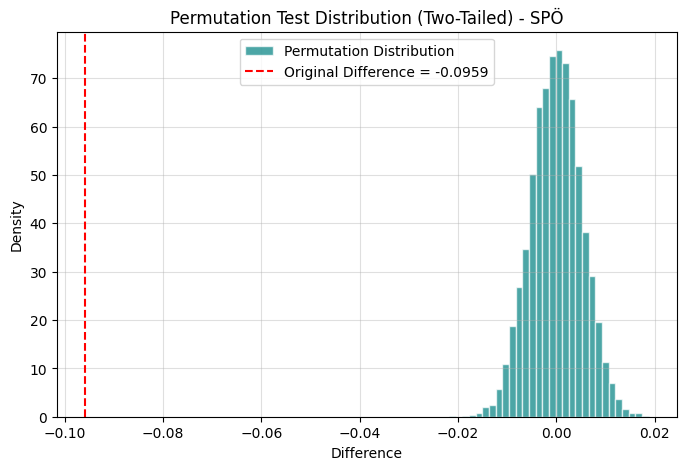

Two-tailed p-value for the H_0: no difference in means:  0.00010


In [5]:
# Perform the updated permutation test and plot for mean - SPÖ
p_value_mean = permutation_test_with_plot_two_tailed(spoe_vor, spoe_nach, np.mean,party="SPÖ")
print(f'Two-tailed p-value for the H_0: no difference in means: {p_value_mean: .5f}')

In [6]:
fpoe_vor = read_data("fpoe_davor.csv")
fpoe_nach = read_data("fpoe_danach.csv")

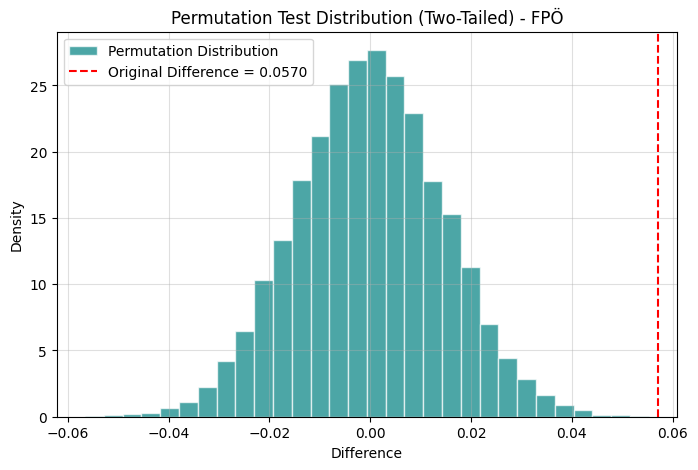

Two-tailed p-value for the H_0: no difference in means:  0.00010


In [7]:
# Perform the updated permutation test and plot for mean - FPÖ
p_value_mean = permutation_test_with_plot_two_tailed(fpoe_vor, fpoe_nach, np.mean, party="FPÖ")
print(f'Two-tailed p-value for the H_0: no difference in means: {p_value_mean: .5f}')

In [8]:
gruene_vor = read_data("gruene_davor.csv")
gruene_nach = read_data("gruene_danach.csv")

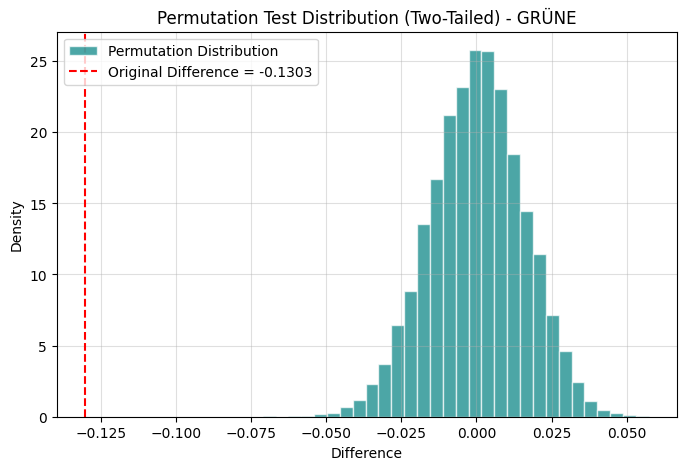

Two-tailed p-value for the H_0: no difference in means:  0.00010


In [9]:
# Perform the updated permutation test and plot for mean - Grüne
p_value_mean = permutation_test_with_plot_two_tailed(gruene_vor, gruene_nach, np.mean, party="GRÜNE")
print(f'Two-tailed p-value for the H_0: no difference in means: {p_value_mean: .5f}')